In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Διαβάζω το dataset από το drive μου

In [37]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/efsyn.csv')

In [3]:
df.head()

,url,section,title,date,author,full_text,media
0,https://www.efsyn.gr/ellada/koinonia/400489_ne...,ΚΟΙΝΩΝΙΑ,Νέο σοκαριστικό βίντεο από την δολοφονική επίθ...,2023-08-10T20:40:47+03:00,efsyn.gr,Βίντεο ντοκουμέντο από τη στιγμή της δολοφονικ...,False
1,https://www.efsyn.gr/ellada/koinonia/400487_ka...,ΚΟΙΝΩΝΙΑ,Καταιγιστικός ρυθμός αποκαλύψεων μετά την τραγ...,2023-08-11T12:03:07+03:00,efsyn.gr,Άκρως αποκαλυπτικά είναι τα στοιχεία που βλέπο...,True
2,https://www.efsyn.gr/ellada/koinonia/400480_th...,ΚΟΙΝΩΝΙΑ,Θανατηφόρο τροχαίο με εγκατάλειψη στις Σέρρες,2023-08-10T18:49:56+03:00,efsyn.gr,Ένας 23χρονος μοτοσικλετιστής έχασε τη ζωή του...,False
3,https://www.efsyn.gr/ellada/koinonia/400461_tr...,ΚΟΙΝΩΝΙΑ,Τροχαία ατυχήματα και πέντε τραυματίες εξαιτία...,2023-08-10T15:00:02+03:00,efsyn.gr,Η ξαφνική αλλαγή του καιρού και η δυνατή νεροπ...,False
4,https://www.efsyn.gr/ellada/koinonia/400450_di...,ΚΟΙΝΩΝΙΑ,Διαμαρτυρία Κίνησης Πολιτών κατά ΑΠΕ για παραπ...,2023-08-10T13:52:07+03:00,efsyn.gr,Τις τελευταίες ημέρες κυκλοφόρησε μια είδηση π...,False


Καθαρίζω τις στήλες title, full_text από na values

In [38]:
df = df.dropna(subset=['title'])
df = df.dropna(subset=['full_text'])

Συγχωνεύω τις στήλες 'title', 'full_text' σε μια στήλη text η οποία δηλαδή θα περιέχει το συνολικό κομμάτι κειμένου που περιέχεται σε κάθε άρθρο

In [39]:
df['text'] = df[['title', 'full_text']].agg('.'.join, axis=1)

Καθαρίζω τη νέα στήλη text από na values

In [40]:
df = df.dropna(subset=['text'])

Δημιουργώ ένα short version του dataframe το οποίο αποτελείται από τις ίδιες στήλες εκτός από τις στήλες url, section

In [41]:
short_df = df
short_df.drop(['url', 'section'], axis='columns', inplace=True)

Καθαρίζω τη στήλη 'text' από όλους τους χαρακτήρες αλλαγής γραμμής

In [42]:
short_df['text'] = short_df['text'].str.replace('/n', '')

In [9]:
short_df.head()

,title,date,author,full_text,media,text
0,Νέο σοκαριστικό βίντεο από την δολοφονική επίθ...,2023-08-10T20:40:47+03:00,efsyn.gr,Βίντεο ντοκουμέντο από τη στιγμή της δολοφονικ...,False,Νέο σοκαριστικό βίντεο από την δολοφονική επίθ...
1,Καταιγιστικός ρυθμός αποκαλύψεων μετά την τραγ...,2023-08-11T12:03:07+03:00,efsyn.gr,Άκρως αποκαλυπτικά είναι τα στοιχεία που βλέπο...,True,Καταιγιστικός ρυθμός αποκαλύψεων μετά την τραγ...
2,Θανατηφόρο τροχαίο με εγκατάλειψη στις Σέρρες,2023-08-10T18:49:56+03:00,efsyn.gr,Ένας 23χρονος μοτοσικλετιστής έχασε τη ζωή του...,False,Θανατηφόρο τροχαίο με εγκατάλειψη στις Σέρρες....
3,Τροχαία ατυχήματα και πέντε τραυματίες εξαιτία...,2023-08-10T15:00:02+03:00,efsyn.gr,Η ξαφνική αλλαγή του καιρού και η δυνατή νεροπ...,False,Τροχαία ατυχήματα και πέντε τραυματίες εξαιτία...
4,Διαμαρτυρία Κίνησης Πολιτών κατά ΑΠΕ για παραπ...,2023-08-10T13:52:07+03:00,efsyn.gr,Τις τελευταίες ημέρες κυκλοφόρησε μια είδηση π...,False,Διαμαρτυρία Κίνησης Πολιτών κατά ΑΠΕ για παραπ...


In [43]:
import datetime as Datetime

In [44]:
pd.set_option('display.max_colwidth', None)

In [45]:
short_df['date'] = pd.to_datetime(short_df.date , format='%Y-%m-%d %H:%M')

In [13]:
import numpy as np

Εξάγω τη μέρα, μήνα, χρόνο, ώρα, λεπτά από τη στήλη date


In [46]:
short_df['Day'] = pd.DatetimeIndex(short_df['date']).day
short_df['Day'] = short_df['Day'].replace('nan', 0)
short_df['Month'] = pd.DatetimeIndex(short_df['date']).month
short_df['Year'] = pd.DatetimeIndex(short_df['date']).year
short_df['Hour'] = pd.DatetimeIndex(short_df['date']).hour
short_df['Minute'] = pd.DatetimeIndex(short_df['date']).minute

<Axes: title={'center': 'EFSYN:\n\nΑριθμός κειμένων ανά αρθρογράφο'}>

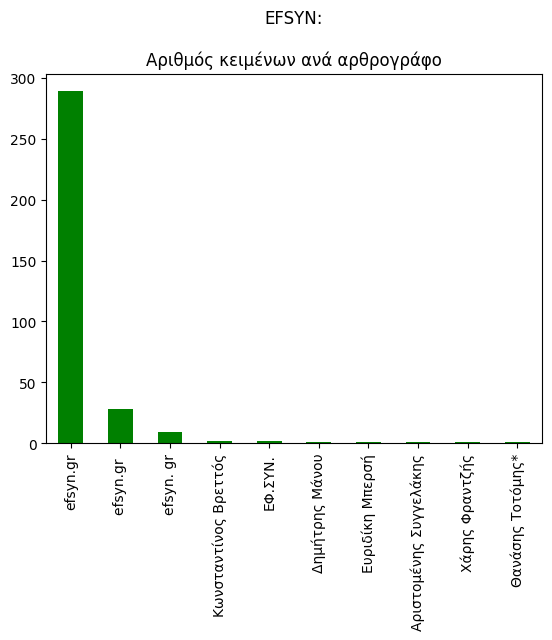

In [ ]:
short_df['author'].value_counts().plot(kind='bar', color = 'g', title= 'EFSYN:\n\nΑριθμός κειμένων ανά αρθρογράφο')

Αφαιρώ από το dataset όλες τις τιμές που περιέχουν efsyn, ΕΦ.ΣΥΝ. στη στήλη author

In [47]:
short_df.loc[short_df['author'].str.contains('efsyn', na=False) | short_df['author'].str.contains('ΕΦ.ΣΥΝ.', na=False), 'author'] = np.nan

Παρουσιάζω μια πίτα που μας δείχνει τα άρθρα ανά ημέρα

<Axes: title={'center': 'EFSYN:\n\nΑριθμός κειμένων ανά αρθρογράφο'}>

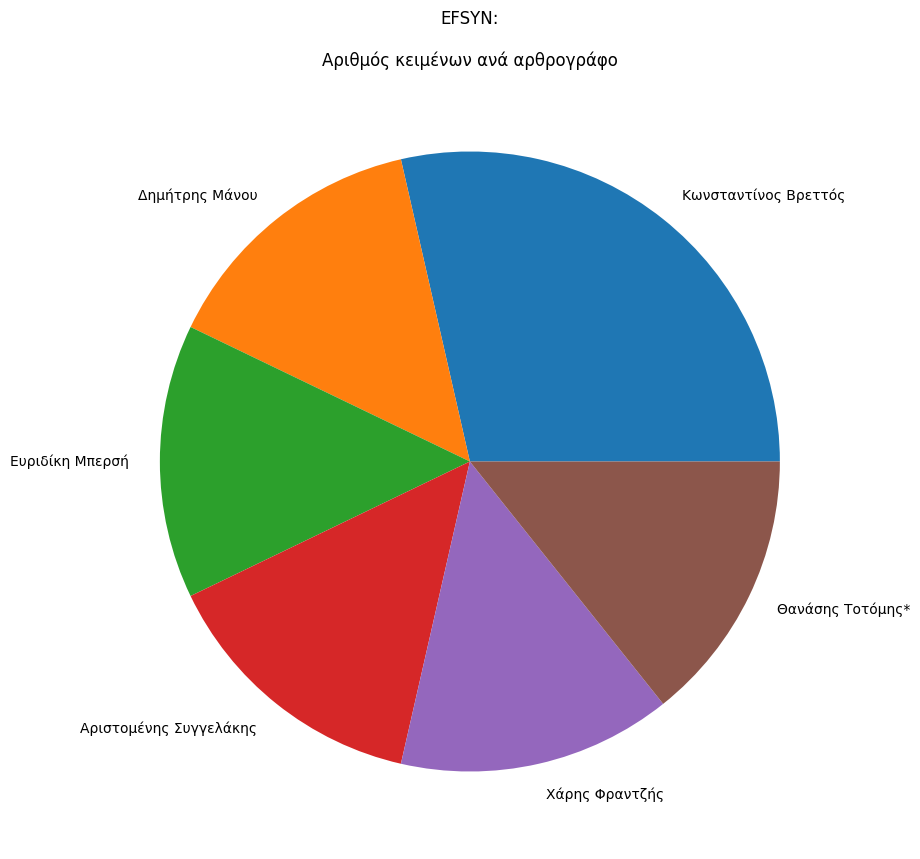

In [ ]:
short_df['author'].value_counts().plot(kind='pie', title= 'EFSYN:\n\nΑριθμός κειμένων ανά αρθρογράφο', figsize=(10,14), label='')

<Axes: title={'center': 'EFSYN:\n\nΑριθμός κειμένων ανά αρθρογράφο'}>

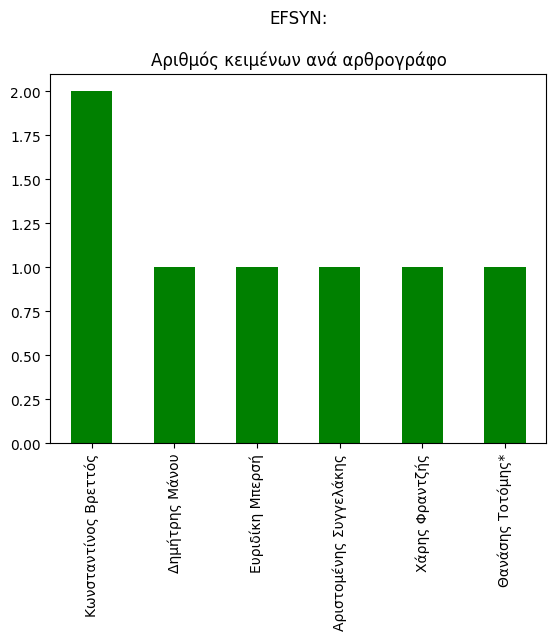

In [ ]:
short_df['author'].value_counts().plot(kind='bar', title= 'EFSYN:\n\nΑριθμός κειμένων ανά αρθρογράφο', color = 'g')

Εξάγω τις λέξεις που περιλαμβάνουν μόνο κεφαλαία γράμματα από τη στήλη title

In [48]:
data = []

for row in short_df['title']:
  words = list(filter(lambda word: not any(char.isdigit()
                                         for char in word), row.split()))

  data.append(sum(word.isupper() for word in words))

short_df['upper_title'] = data

<Axes: title={'center': 'EFSYN:\n\n0 λέξεις με κεφαλαία στο τίτλο, 1 λέξη , 2 λέξεις'}>

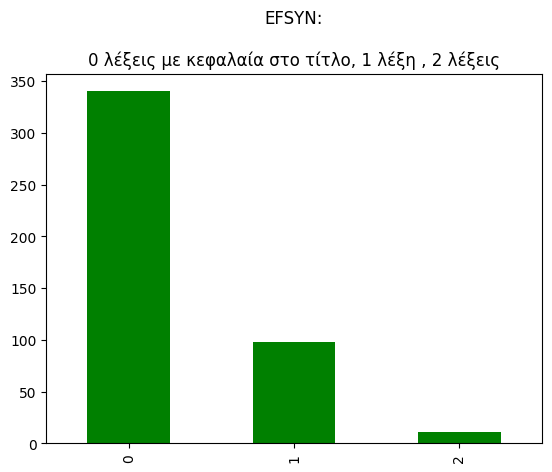

In [55]:
short_df['upper_title'].value_counts().plot(kind='bar', color = 'g', title='EFSYN:\n\n0 λέξεις με κεφαλαία στο τίτλο, 1 λέξη , 2 λέξεις')

Εξάγω τις λέξεις που περιλαμβάνουν μόνο κεφαλαία γράμματα από τη στήλη text

In [49]:
data = []

for row in short_df['text']:
  words = list(filter(lambda word: not any(char.isdigit()
                                         for char in word), row.split()))

  data.append(sum(word.isupper() for word in words))

short_df['upper_text'] = data

<Axes: title={'center': 'EFSYN:\n\nΆθροισμα άρθρων με κεφαλαίες λέξεις ανά ημέρα'}>

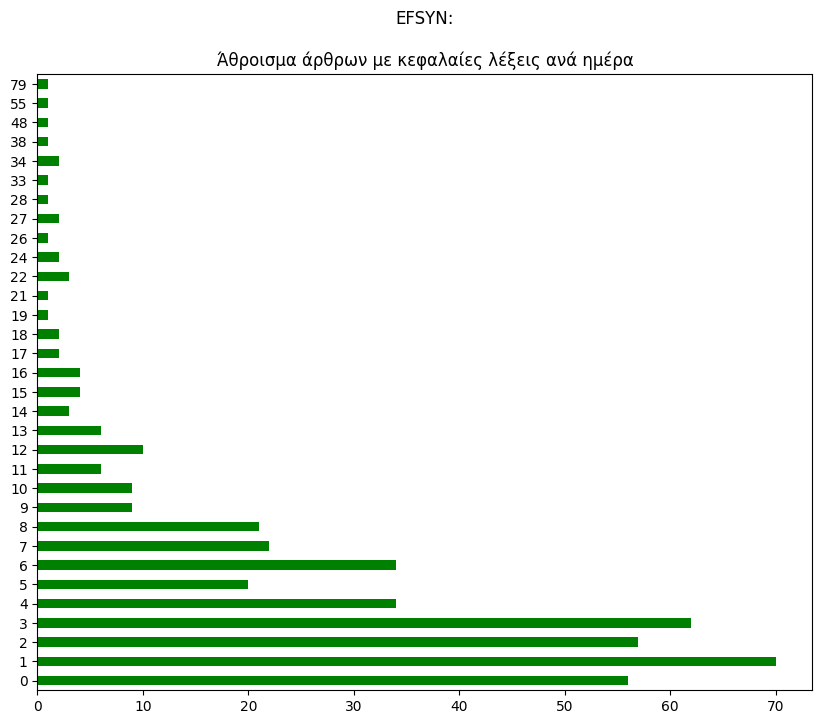

In [18]:
short_df['upper_text'].value_counts().sort_index(ascending=True).plot(kind='barh', color = 'g', title= 'EFSYN:\n\nΆθροισμα άρθρων με κεφαλαίες λέξεις ανά ημέρα', figsize=(10,8))

<Axes: title={'center': 'EFSYN:\n\nΑριθμός άρθρων που περιέχουν μέσα'}>

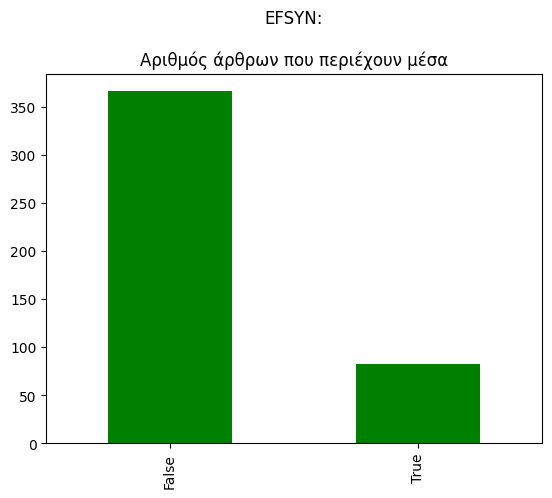

In [ ]:
short_df['media'].value_counts().plot(kind='bar', color = 'g', title= 'EFSYN:\n\nΑριθμός άρθρων που περιέχουν μέσα')

<Axes: title={'center': 'EFSYN:\n\nΑριθμός άρθρων που περιέχουν μέσα'}, ylabel='media'>

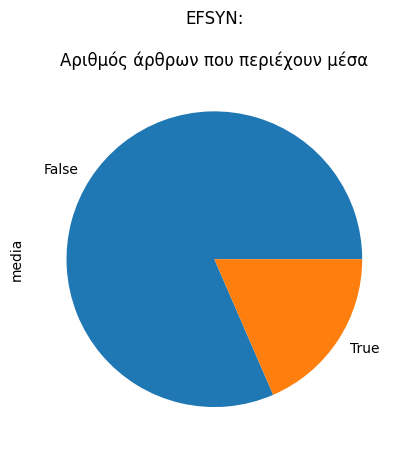

In [ ]:
short_df['media'].value_counts().plot(kind='pie', title= 'EFSYN:\n\nΑριθμός άρθρων που περιέχουν μέσα')

In [19]:
import spacy

In [ ]:
# !python -m spacy download el_core_news_sm

In [25]:
nlp = spacy.load('el_core_news_sm')

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import spacy

In [ ]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20, ngram_range=(2, 2))
count_vector = cv.fit_transform(short_df['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

In [ ]:
results.sum(axis =0).sort_values(ascending = False)

πολιτικής προστασίας      149
βαθμούς κελσίου           106
υψηλός κίνδυνος            72
άνεμοι πνέουν              62
κίνδυνος πυρκαγιάς         59
υψηλές θερμοκρασίες        56
εθνικού αστεροσκοπείου     55
κλιματικής κρίσης          53
δασικών πυρκαγιών          48
meteo gr                   47
αστεροσκοπείου αθηνών      46
σύμφωνα πληροφορίες        46
θερμοκρασία κυμανθεί       41
πύρινα μέτωπα              41
ελεύθερες παραλίες         39
pic twitter                38
κρίσης πολιτικής           38
πρόβλεψης κινδύνου         38
ιουλίου 2023               37
μέγιστες τιμές             37
dtype: int64

In [ ]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head()

πολιτικής προστασίας    149
βαθμούς κελσίου         106
υψηλός κίνδυνος          72
άνεμοι πνέουν            62
κίνδυνος πυρκαγιάς       59
dtype: int64

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

tfidf_vectorizer = TfidfVectorizer(stop_words= list(nlp.Defaults.stop_words), max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(short_df['text'])

results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

arr = cosine_similarity(tfidf_matrix_train[0:10], tfidf_matrix_train[0:10])

Παρουσιάζω τον βαθμό ομοιότητας των 10 πρώτων άρθρων

<Axes: title={'center': 'EFSYN:\n\nΒαθμός ομοιότητας των 10 πρώτων άρθρων'}>

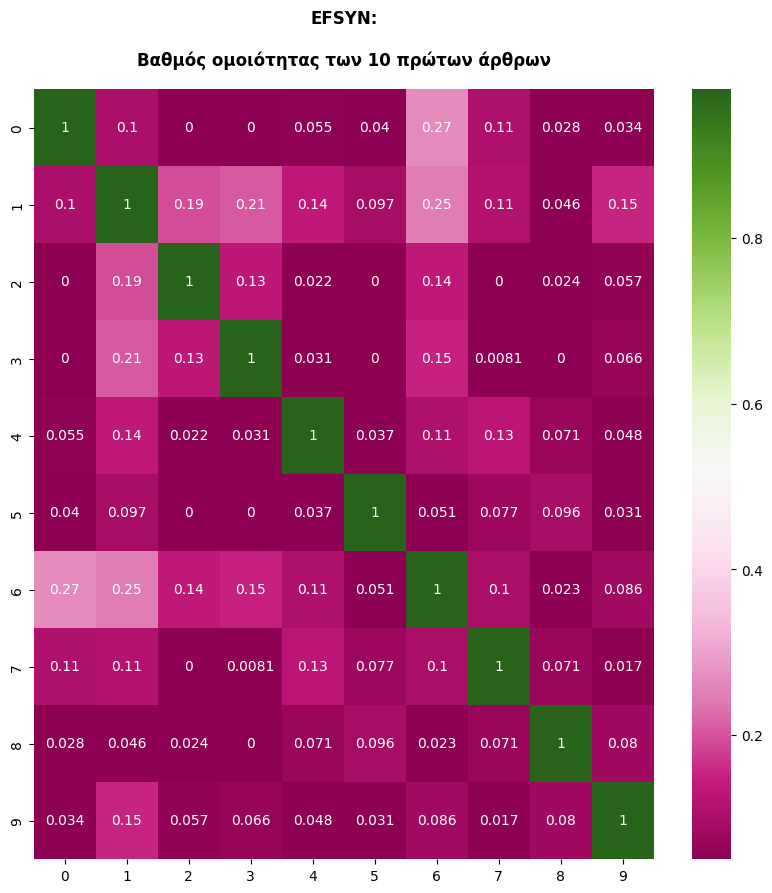

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.title('EFSYN:\n\nΒαθμός ομοιότητας των 10 πρώτων άρθρων', y=1.02, fontweight='bold')
sns.heatmap(data=arr, annot=True, vmin=0.05, vmax=0.98, cmap="PiYG")

# Sentiment Analysis σε κείμενα

In [20]:
filepath ='https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv'

In [26]:
emolex_df = pd.read_csv(filepath)

emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)

vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

In [27]:
positive_words = emolex_df[emolex_df.Positive == 1]['word']
negative_words = emolex_df[emolex_df.Negative == 1]['word']
angry_words = emolex_df[emolex_df.Anger == 1]['word']
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']
fear_words = emolex_df[emolex_df.Fear == 1]['word']
joy_words = emolex_df[emolex_df.Joy == 1]['word']
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']
trust_words = emolex_df[emolex_df.Trust == 1]['word']

In [28]:
matrix = vec.fit_transform(short_df['full_text'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε',

Προσθέτουμε στο dataframe μια στήλη ανά συναίσθημα. Κάθε γραμμή της στήλης θα δείχνει το πόσες λέξεις που εκπροσωπούν το εκάστοτε συναίσθημα περιέχονται στο κείμενο του άρθρου

In [29]:
text_emot = short_df

text_emot['anger'] = wordcount_df[angry_words].sum(axis=1)
text_emot['positive'] = wordcount_df[positive_words].sum(axis=1)
text_emot['joy'] = wordcount_df[joy_words].sum(axis=1)
text_emot['disgust'] = wordcount_df[disgust_words].sum(axis=1)
text_emot['surprise'] = wordcount_df[surprise_words].sum(axis=1)
text_emot['trust'] = wordcount_df[trust_words].sum(axis=1)
text_emot['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)
text_emot['sadness'] = wordcount_df[sadness_words].sum(axis=1)
text_emot['negative'] = wordcount_df[negative_words].sum(axis=1)
text_emot['fear'] = wordcount_df[fear_words].sum(axis=1)

text_emot.reset_index(inplace=True)
text_emot.set_index('date', inplace=True)

Παρουσιάζω τον μέσο αριθμό λέξεων που αποτελούνται τα άρθρα της κάθε μέρας

<Axes: title={'center': 'EFSYN:\n\nΜέσος όρος λέξεων στο κείμενο ανά ημέρα'}, xlabel='date'>

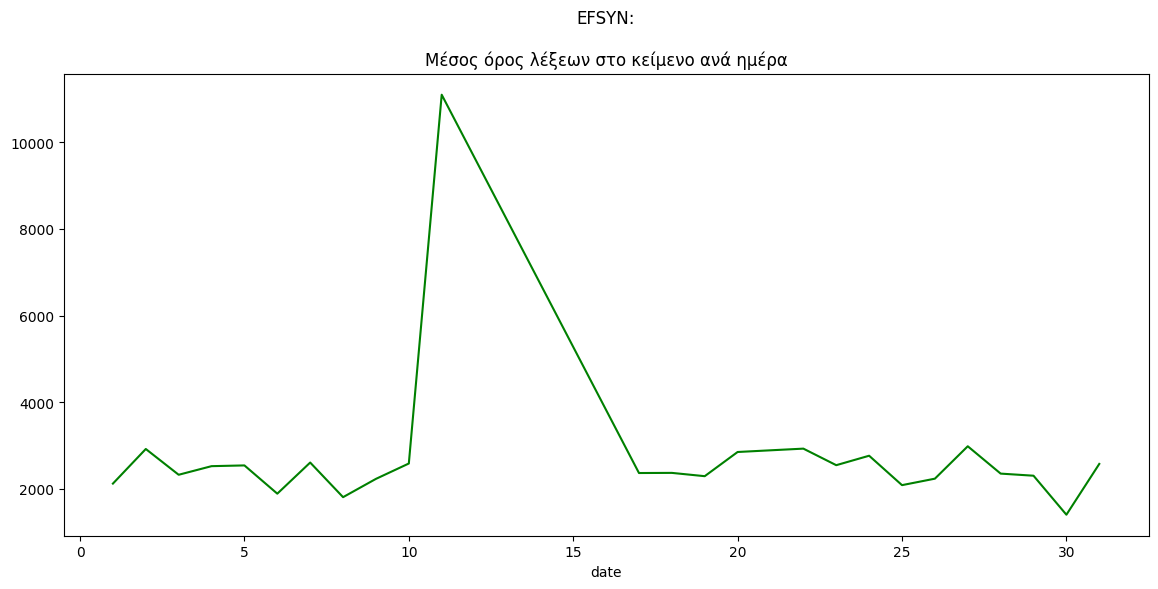

In [30]:
short_df['text'].str.len().groupby(by=short_df.index.day).mean().plot(color="g", title='EFSYN:\n\nΜέσος όρος λέξεων στο κείμενο ανά ημέρα',figsize=(14,6))

Παρουσιάζω τον μέσο αριθμό λέξεων που αποτελούνται τα άρθρα της κάθε μέρας, χρησιμοποιώντας το respample


<Axes: title={'center': 'EFSYN:\n\nΜέσος αριθμός λέξεων στο κείμενο ανά ημέρα'}, xlabel='date'>

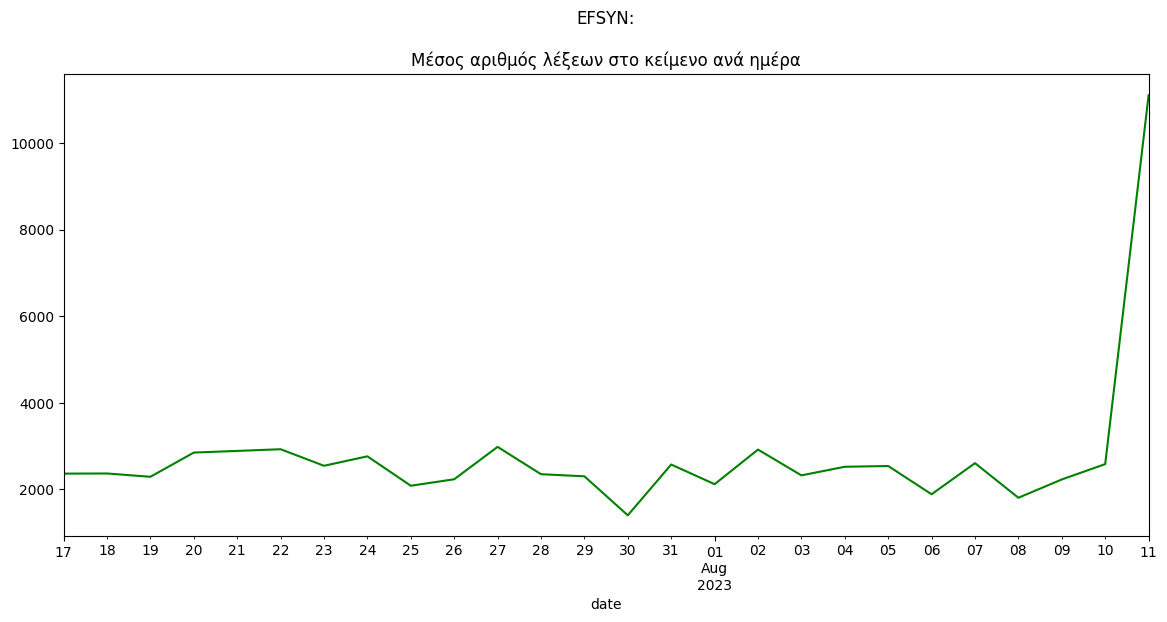

In [31]:
short_df['text'].str.len().resample('D').mean().plot(color="g",title= 'EFSYN:\n\nΜέσος αριθμός λέξεων στο κείμενο ανά ημέρα',figsize=(14,6))

<Axes: title={'center': 'EFSYN:\n\nΜέσος αριθμός λέξεων στον τίτλο ανά ημέρα'}, xlabel='date'>

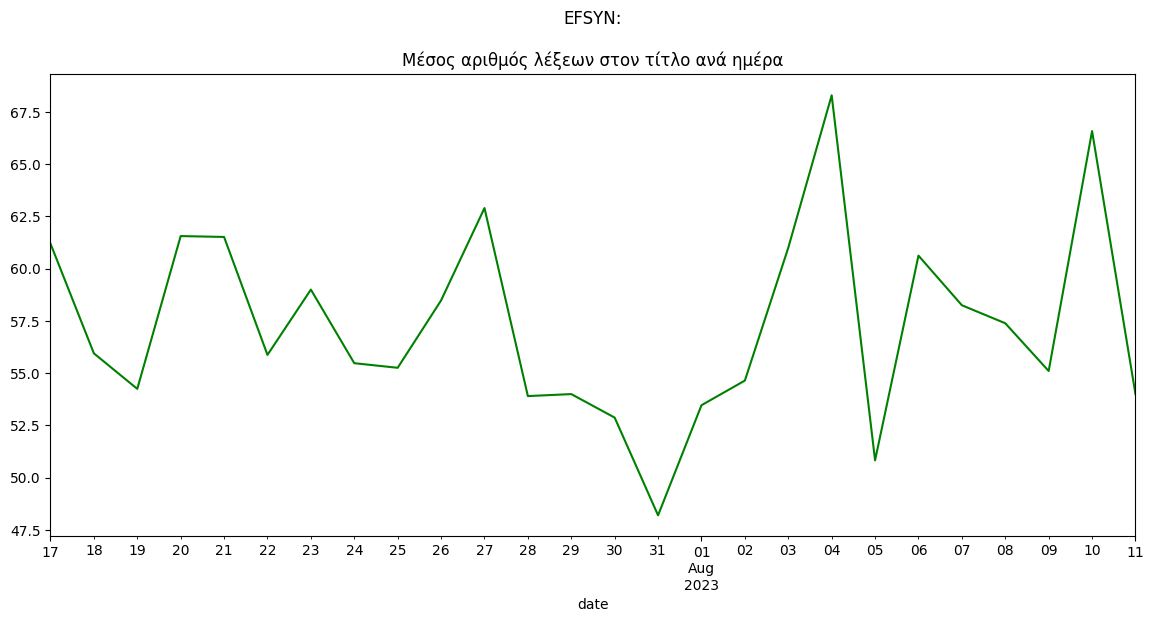

In [32]:
short_df['title'].str.len().resample('D').mean().plot(color="g", title='EFSYN:\n\nΜέσος αριθμός λέξεων στον τίτλο ανά ημέρα',figsize=(14,6))

Παρουσιάζω στο ίδιο διάγραμμα το άθροισμα των λέξεων με συναίσθημα εκνευρισμού και ευτυχίας που δημοσιεύτηκαν σε άρθρα ανά ημέρα

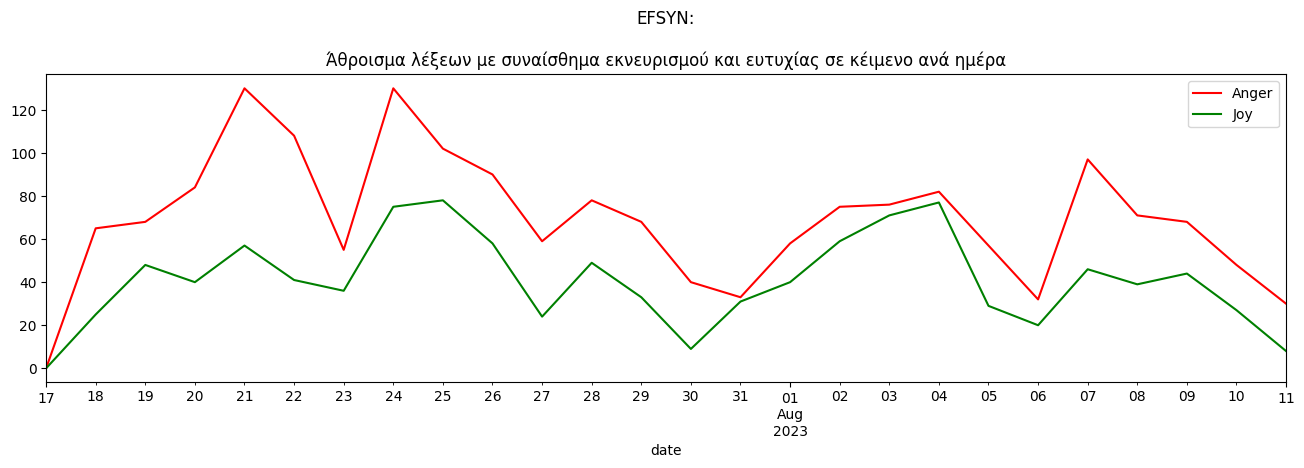

In [35]:
ax = text_emot['anger'].resample('D').sum().plot(figsize=(16,4), color = 'red')
text_emot['joy'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'green',title= 'EFSYN:\n\nΆθροισμα λέξεων με συναίσθημα εκνευρισμού και ευτυχίας σε κέιμενο ανά ημέρα')
plt.legend(['Anger', 'Joy'])

Παρουσιάζω στο ίδιο διάγραμμα το άθροισμα των λέξεων με συναίσθημα θετικό, αρνητικό και εμπιστοσύνης που δημοσιεύτηκαν σε άρθρα ανά ημέρα

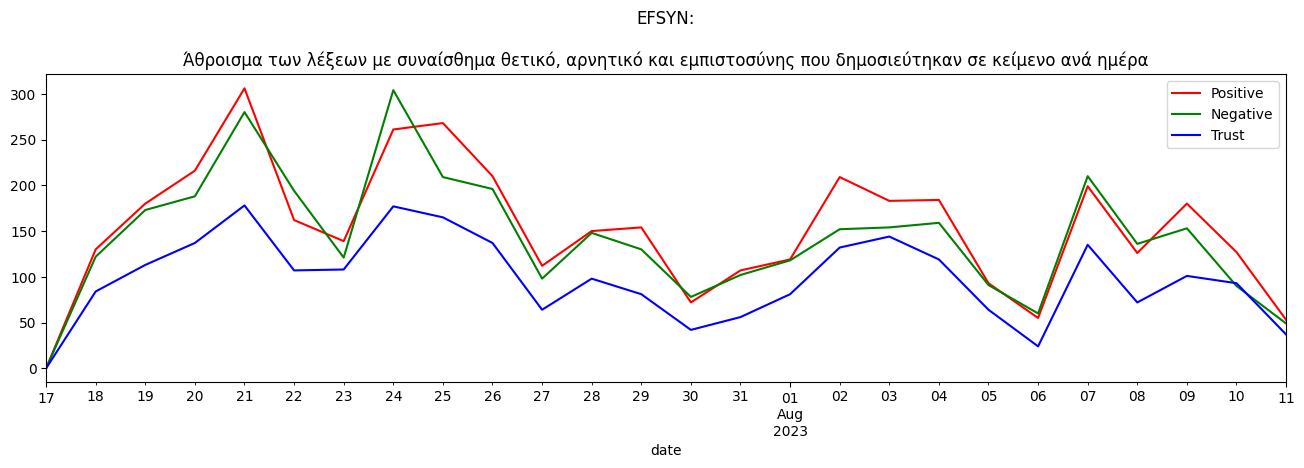

In [36]:
ax = text_emot['positive'].resample('D').sum().plot(figsize=(16,4), color = 'red')
text_emot['negative'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'green')
text_emot['trust'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'blue', title='EFSYN:\n\nΆθροισμα των λέξεων με συναίσθημα θετικό, αρνητικό και εμπιστοσύνης που δημοσιεύτηκαν σε κείμενο ανά ημέρα')
plt.legend(['Positive', 'Negative', 'Trust'])

# Sentiment Analysis σε τίτλους

In [50]:
matrix = vec.fit_transform(short_df['title'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)

In [51]:
title_emot = short_df

title_emot['anger'] = wordcount_df[angry_words].sum(axis=1)
title_emot['positive'] = wordcount_df[positive_words].sum(axis=1)
title_emot['joy'] = wordcount_df[joy_words].sum(axis=1)
title_emot['disgust'] = wordcount_df[disgust_words].sum(axis=1)
title_emot['surprise'] = wordcount_df[surprise_words].sum(axis=1)
title_emot['trust'] = wordcount_df[trust_words].sum(axis=1)
title_emot['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)
title_emot['sadness'] = wordcount_df[sadness_words].sum(axis=1)
title_emot['negative'] = wordcount_df[negative_words].sum(axis=1)
title_emot['fear'] = wordcount_df[fear_words].sum(axis=1)

In [52]:
title_emot.reset_index(inplace=True)
title_emot.set_index('date', inplace=True)

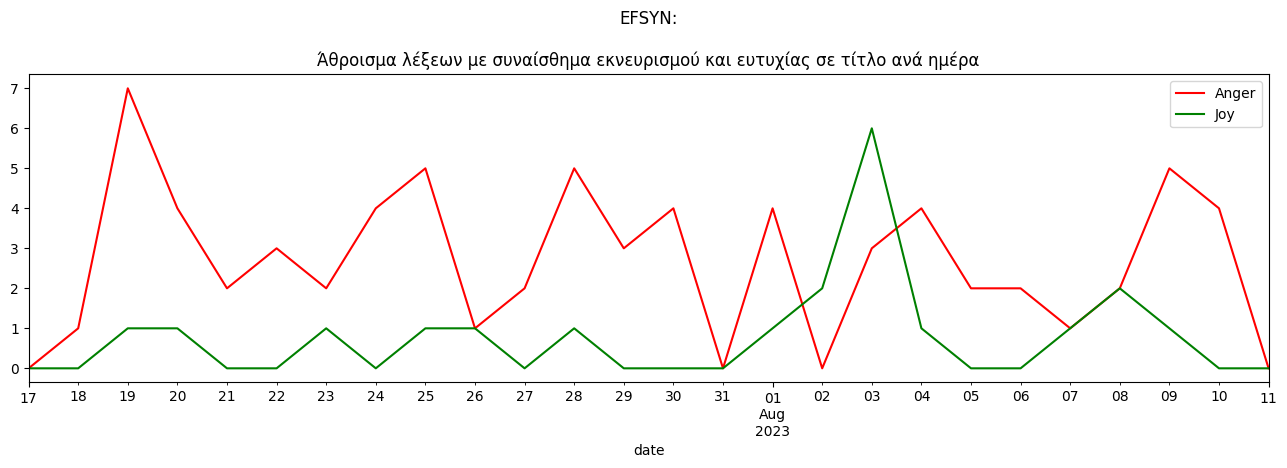

In [53]:
ax = title_emot['anger'].resample('D').sum().plot(figsize=(16,4), color = 'red')
title_emot['joy'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'green',title= 'EFSYN:\n\nΆθροισμα λέξεων με συναίσθημα εκνευρισμού και ευτυχίας σε τίτλο ανά ημέρα')
plt.legend(['Anger', 'Joy'])

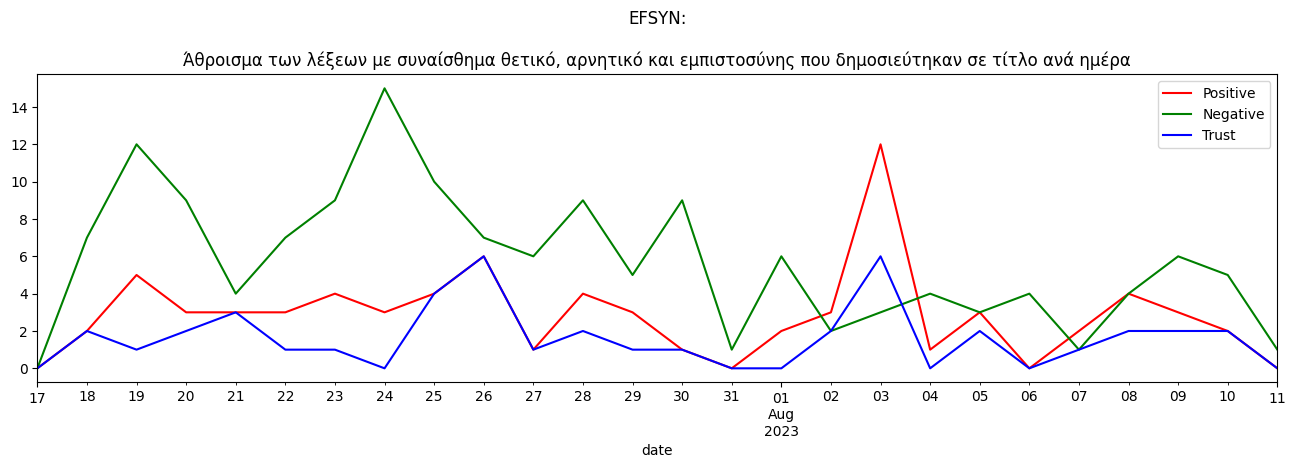

In [54]:
ax_title = title_emot['positive'].resample('D').sum().plot(figsize=(16,4), color = 'red')
title_emot['negative'].resample('D').sum().plot(figsize=(16,4), ax = ax_title, color = 'green')
title_emot['trust'].resample('D').sum().plot(figsize=(16,4), ax = ax_title, color = 'blue',title='EFSYN:\n\nΆθροισμα των λέξεων με συναίσθημα θετικό, αρνητικό και εμπιστοσύνης που δημοσιεύτηκαν σε τίτλο ανά ημέρα')
plt.legend(['Positive', 'Negative', 'Trust'])

Εξάγω τον αριθμό σημείων στίξης που περιέχονται στα κείμενα των άρθρων

In [ ]:
import string

count = lambda l1,l2: sum([1 for x in l1 if x in l2])

data = []
for text in short_df['text']:

  words = text.split()

  count_punctuation = 0
  for word in words:
    count_punctuation += count(word,set(string.punctuation))

  data.append(count_punctuation)

short_df['punctuations_text'] = data

<Axes: title={'center': 'EFSYN:\n\nΜέσος αριθμός σημείων στίξης στο κείμενο ανά ημέρα'}, xlabel='Day'>

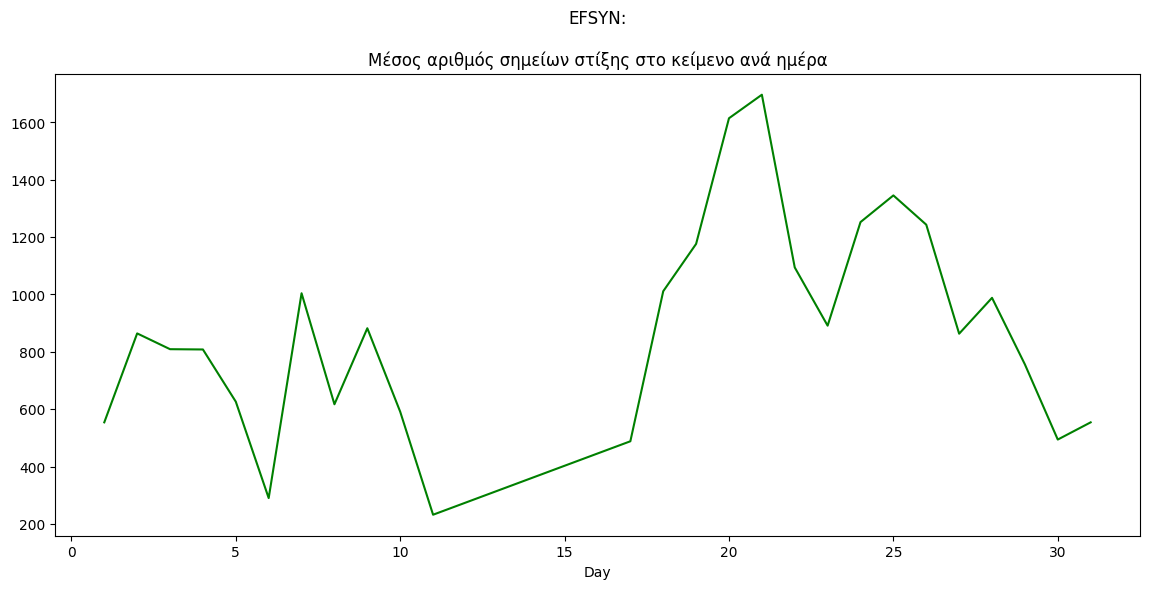

In [ ]:
short_df['punctuations_text'].groupby(by=short_df.Day).sum().plot(color="g",title='EFSYN:\n\nΜέσος αριθμός σημείων στίξης στο κείμενο ανά ημέρα',figsize=(14,6))

<Axes: title={'center': 'EFSYN:\n\nΜέσος όρος σημείων στίξης στο κείμενο ανά ημέρα'}, xlabel='Day'>

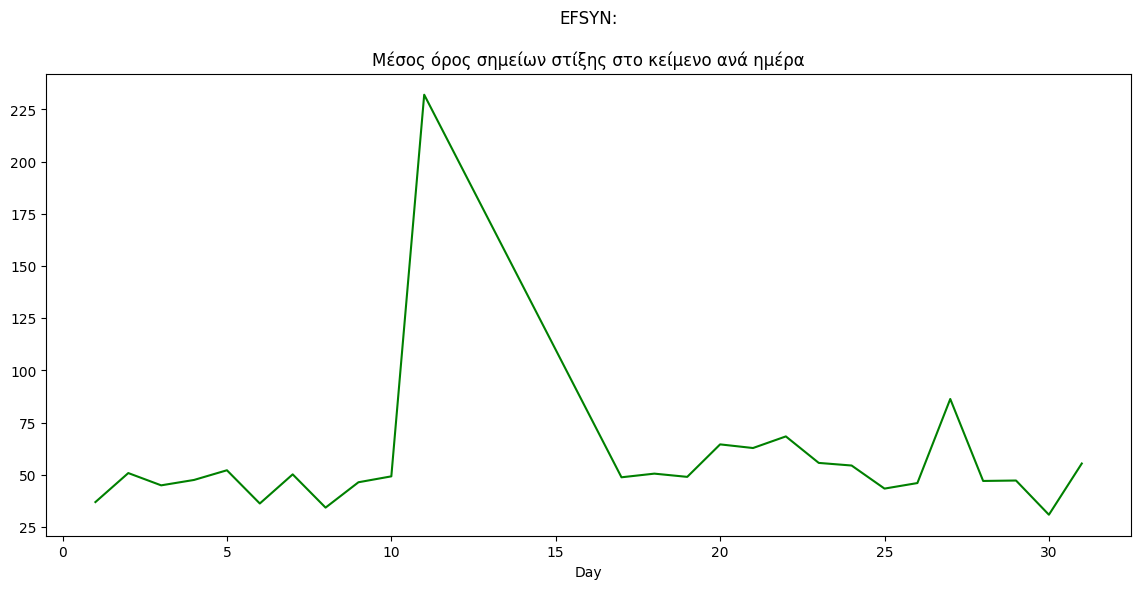

In [ ]:
short_df['punctuations_text'].groupby(by=short_df.Day).mean().plot(color="g",title='EFSYN:\n\nΜέσος όρος σημείων στίξης στο κείμενο ανά ημέρα',figsize=(14,6))

Εξάγω τον αριθμό σημείων στίξης που περιέχονται στους τίτλους των άρθρων

In [ ]:
import string

count = lambda l1,l2: sum([1 for x in l1 if x in l2])

data = []

for row in short_df['title']:
  words = list(filter(lambda word: not any(char.isdigit()
                                         for char in word), row.split()))

  data.append(sum(count(word,set(string.punctuation)) for word in words))

short_df['punctuations_title'] = data

<Axes: title={'center': 'EFSYN:\n\nΜέσος αριθμός σημείων στίξης σε τίτλο ανά ημέρα'}, xlabel='date'>

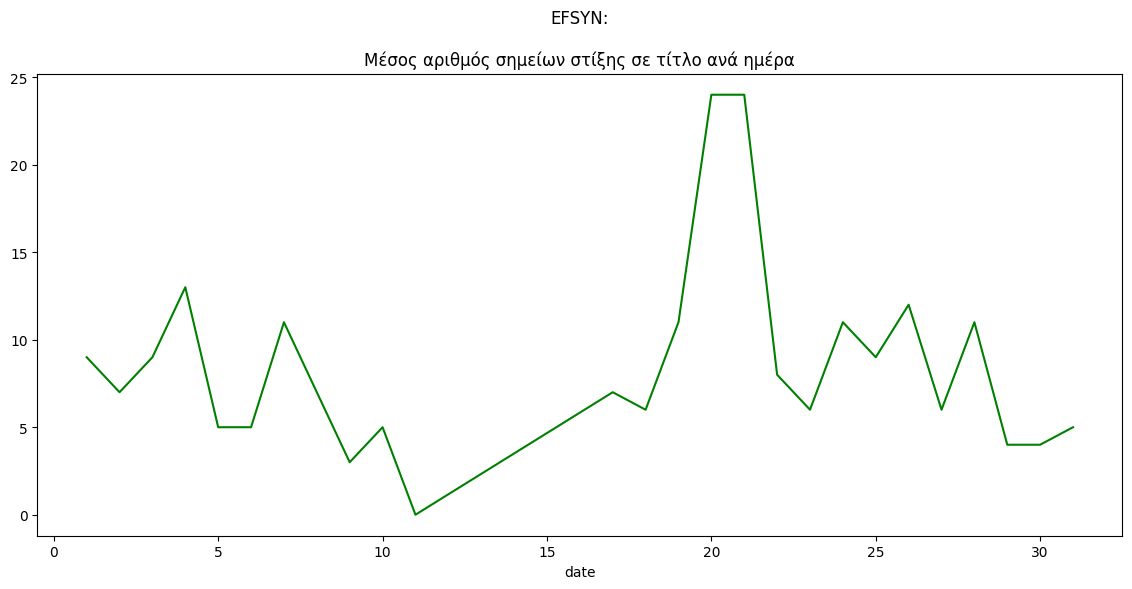

In [ ]:
short_df['punctuations_title'].groupby(by=short_df.index.day).sum().plot(color="g",title='EFSYN:\n\nΜέσος αριθμός σημείων στίξης σε τίτλο ανά ημέρα',figsize=(14,6))

<Axes: title={'center': 'EFSYN:\n\nΜέσος όρος σημείων στίξης σε τίτλο ανά ημέρα'}, xlabel='date'>

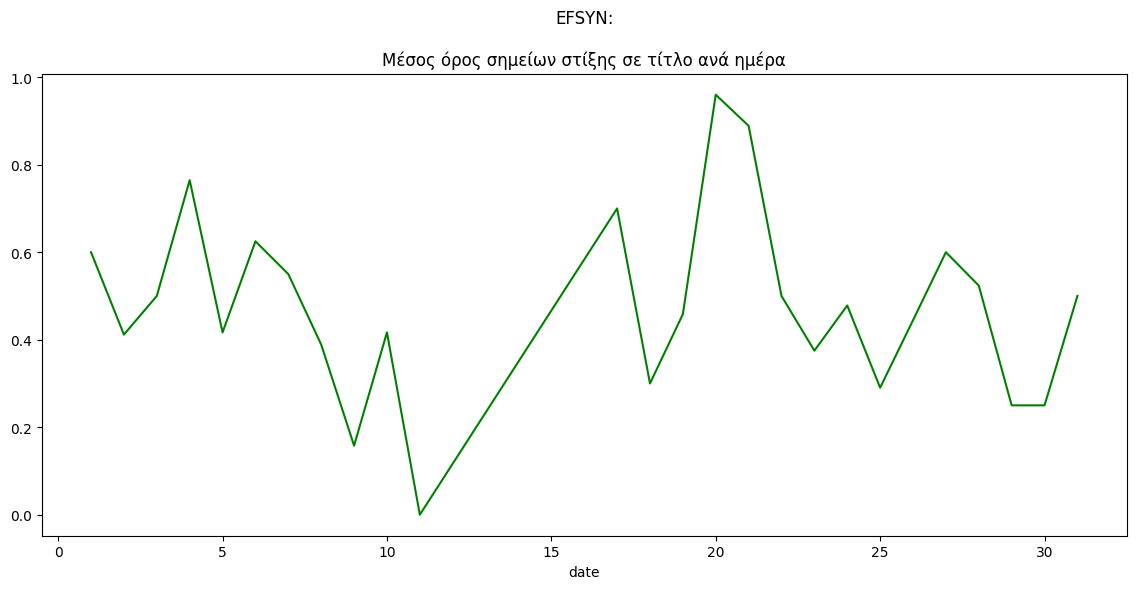

In [ ]:
short_df['punctuations_title'].groupby(by=short_df.index.day).mean().plot(color="g",title='EFSYN:\n\nΜέσος όρος σημείων στίξης σε τίτλο ανά ημέρα',figsize=(14,6))

In [ ]:
short_df.to_csv("drive/MyDrive/short_efsyn.csv", index=False)